# Porto Seguro Safe Driver — Data Exploration for Risk Prediction

## 1. Business Framing

Porto Seguro wants to predict the probability that a client will file an auto insurance claim in the next year. 
Claims represent direct financial cost to the insurer and are a key driver of pricing, underwriting, and risk management decisions.

This dataset represents a privacy-preserving version of underwriting data, where feature meanings are anonymized but grouped by type 
(e.g., individual, vehicle, regional, and calculated features). The goal of this analysis is to assess data quality, signal strength, 
and feasibility of building an ML-based risk scoring system.


## 2. Data Understanding & EDA Summary

### 2.1 Import data, inspect columns & basic structure

In [1]:
import pandas as pd

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_sub = pd.read_csv("sample_submission.csv")

print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("Sample submission shape:", sample_sub.shape)


Train shape: (595212, 59)
Test shape: (892816, 58)
Sample submission shape: (892816, 2)


In [ ]:
train.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


In [ ]:
test.columns

Index(['id', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      dtyp

In [ ]:
"target" in test.columns

False

"Target" column is only in the train set. Except for that, they have the same columns.

In [ ]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [34]:
train.describe

<bound method NDFrame.describe of              id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0             7       0          2              2          5              1   
1             9       0          1              1          7              0   
2            13       0          5              4          9              1   
3            16       0          0              1          2              0   
4            17       0          0              2          0              1   
...         ...     ...        ...            ...        ...            ...   
595207  1488013       0          3              1         10              0   
595208  1488016       0          5              1          3              0   
595209  1488017       0          1              1         10              0   
595210  1488021       0          5              2          3              1   
595211  1488027       0          0              1          8              0   

        ps_ind_05

## Dataset Structure Summary

- Each row represents one insurance policyholder.
- The training set includes the target variable indicating whether a claim occurred.
- The test set contains the same features but without the target.
- Feature names are anonymized but grouped by prefixes:
  - `ind`: individual-related
  - `reg`: regional-related
  - `car`: vehicle-related
  - `calc`: derived or engineered features

This suggests the model relies on structured underwriting-style data rather than behavioral signals.


### 2.2 Feature Type Breakdown

Shows how much of the model depends on:
- binary signals
- categorical segmentation
- numeric risk scores

Supports product questions about what kinds of data drive risk.

In [8]:
target = train["target"]
features = train.drop(columns=["target"])
features.shape


(595212, 58)

In [12]:
bin_features = [c for c in features.columns if c.endswith("_bin")]
len(bin_features)

cat_features = [c for c in features.columns if c.endswith("_cat")]
len(cat_features)

num_features = [c for c in features.columns 
                if not c.endswith("_bin") and not c.endswith("_cat") and c != "id"]
len(num_features)

pd.DataFrame({
    "Feature Type": ["Binary", "Categorical", "Numeric/Ordinal"],
    "Count": [len(bin_features), len(cat_features), len(num_features)]
})


,Feature Type,Count
0,Binary,17
1,Categorical,14
2,Numeric/Ordinal,26


*Exploring categorical values*

In [35]:
train[cat_features].describe().T


,count,mean,std,min,25%,50%,75%,max
ps_ind_02_cat,595212.0,1.358943,0.664594,-1.0,1.0,1.0,2.0,4.0
ps_ind_04_cat,595212.0,0.416794,0.493311,-1.0,0.0,0.0,1.0,1.0
ps_ind_05_cat,595212.0,0.405188,1.350642,-1.0,0.0,0.0,0.0,6.0
ps_car_01_cat,595212.0,8.295933,2.508270,-1.0,7.0,7.0,11.0,11.0
ps_car_02_cat,595212.0,0.829931,0.375716,-1.0,1.0,1.0,1.0,1.0
ps_car_03_cat,595212.0,-0.504899,0.788654,-1.0,-1.0,-1.0,0.0,1.0
ps_car_04_cat,595212.0,0.725192,2.153463,0.0,0.0,0.0,0.0,9.0
ps_car_05_cat,595212.0,-0.157732,0.844417,-1.0,-1.0,0.0,1.0,1.0
ps_car_06_cat,595212.0,6.555340,5.501445,0.0,1.0,7.0,11.0,17.0
ps_car_07_cat,595212.0,0.910027,0.347106,-1.0,1.0,1.0,1.0,1.0


In [36]:
cat_summary = pd.DataFrame({
    "min": train[cat_features].min(),
    "max": train[cat_features].max(),
    "n_unique": train[cat_features].nunique(),
    "missing_rate": (train[cat_features] == -1).mean()
}).sort_values("n_unique", ascending=False)

cat_summary



,min,max,n_unique,missing_rate
ps_car_11_cat,1,104,104,0.000000
ps_car_06_cat,0,17,18,0.000000
ps_car_01_cat,-1,11,13,0.000180
ps_car_04_cat,0,9,10,0.000000
ps_ind_05_cat,-1,6,8,0.009760
ps_car_09_cat,-1,4,6,0.000956
ps_ind_02_cat,-1,4,5,0.000363
ps_ind_04_cat,-1,1,3,0.000139
ps_car_02_cat,-1,1,3,0.000008
ps_car_03_cat,-1,1,3,0.690898


In [39]:
train["ps_car_03_cat"].value_counts(dropna=False).sort_index()


ps_car_03_cat
-1    411231
 0     73272
 1    110709
Name: count, dtype: int64

In [40]:
train["ps_car_06_cat"].value_counts(dropna=False).sort_index()

ps_car_06_cat
0     110420
1     118386
2       1607
3      11997
4      31136
5       1401
6      20951
7      16158
8       1412
9      17617
10     33466
11    131527
12      2386
13      6246
14     59253
15     21732
16      4582
17      4935
Name: count, dtype: int64

In [41]:
train["ps_car_08_cat"].value_counts(dropna=False).sort_index()

ps_car_08_cat
0     99948
1    495264
Name: count, dtype: int64

This one looks binary!

In [13]:
def get_group(col):
    return col.split("_")[1]

group_counts = pd.Series([get_group(c) for c in features.columns if c != "id"]).value_counts()
group_counts


calc    20
ind     18
car     16
reg      3
Name: count, dtype: int64

The dataset relies heavily on engineered (calc) and individual-level (ind) features, with very few regional variables. This suggests decisions are driven more by personal and vehicle characteristics than by geography.

### 2.3 Missing Data

Note: missing values are encoded as -1, not NaN.

In [15]:
features_nan = features.replace(-1, pd.NA)

missing_rate = features_nan.isna().mean().sort_values(ascending=False)
missing_rate.head(10)



ps_car_03_cat    0.690898
ps_car_05_cat    0.447825
ps_reg_03        0.181065
ps_car_14        0.071605
ps_car_07_cat    0.019302
ps_ind_05_cat    0.009760
ps_car_09_cat    0.000956
ps_ind_02_cat    0.000363
ps_car_01_cat    0.000180
ps_ind_04_cat    0.000139
dtype: float64

ps_car_03_cat → 69% missing

ps_car_05_cat → 45% missing

ps_reg_03 → 18% missing

In [ ]:
(missing_rate > 0).sum() # how many features have missing values?


np.int64(13)

Does Missing Data Correlate with Risk?

In [24]:
has_missing = features_nan.isna().any(axis=1)
pd.DataFrame({
    "has_missing": has_missing,
    "target": target
}).groupby("has_missing")["target"].mean()


has_missing
False    0.045385
True     0.034073
Name: target, dtype: float64

No missing data → claim rate = 4.54%
Missing data  → claim rate = 3.41%

Drivers with missing data actually have LOWER claim probability than drivers with complete data.
This could mean:
- Certain low-risk customer segments provide less information
- Or high-risk drivers tend to have more complete records (e.g., prior history)

### 2.4 Target Distribution

In [33]:
claim_rate = target.mean()
claim_rate


np.float64(0.036447517859182946)

In [22]:
target.value_counts(normalize=True)

target
0    0.963552
1    0.036448
Name: proportion, dtype: float64

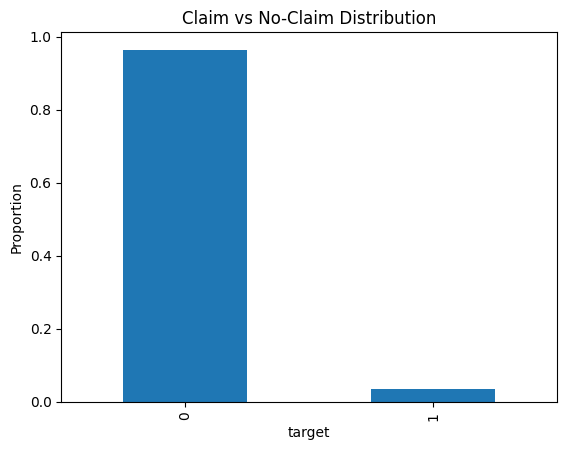

In [23]:
import matplotlib.pyplot as plt

target.value_counts(normalize=True).plot(kind="bar")
plt.title("Claim vs No-Claim Distribution")
plt.ylabel("Proportion")
plt.show()


### Target Imbalance and Business Implications

- Only 3,6% of clients file claims, indicating a highly imbalanced dataset.
- This reflects real insurance dynamics, where most customers are profitable and only a few generate large costs.

Implications:
- Accuracy is not a useful metric (predicting 'no claim' always would appear highly accurate).
- Risk scoring and ranking are more relevant than hard classification.
- Business decisions must balance preventing costly claims vs rejecting profitable customers.

- False negatives (miss a risky driver) → high claim cost
- False positives (flag low-risk driver) → lose revenue or frustrate customer


### 2.5 Correlation plots

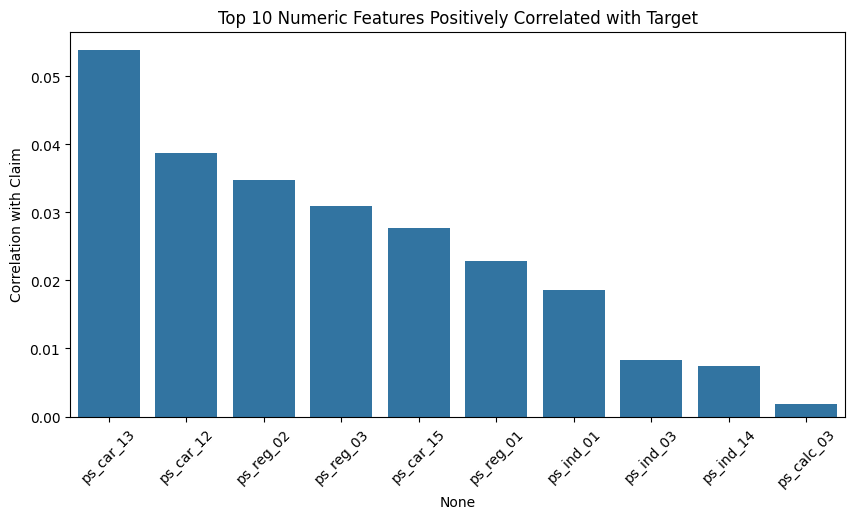

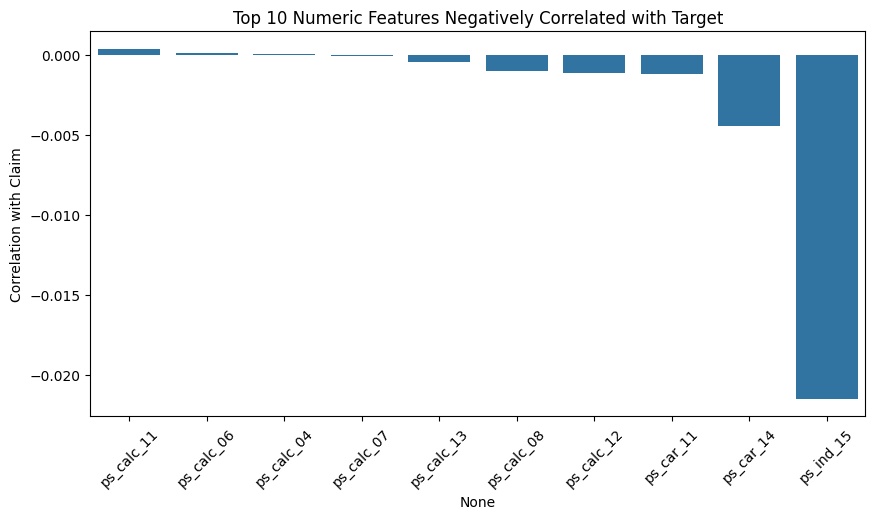

In [ ]:
num_features = [c for c in features.columns if not c.endswith("_bin") and not c.endswith("_cat") and c != "id"]
corr_with_target = train[num_features + ["target"]].corr()["target"].sort_values(ascending=False)

top_corr = corr_with_target.drop("target").head(10)  # top 10 positively correlated
bottom_corr = corr_with_target.drop("target").tail(10)  # top 10 negatively correlated

plt.figure(figsize=(10,5))
sns.barplot(x=top_corr.index, y=top_corr.values)
plt.title("Top 10 Numeric Features Positively Correlated with Target")
plt.xticks(rotation=45)
plt.ylabel("Correlation with Claim")
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x=bottom_corr.index, y=bottom_corr.values)
plt.title("Top 10 Numeric Features Negatively Correlated with Target")
plt.xticks(rotation=45)
plt.ylabel("Correlation with Claim")
plt.show()



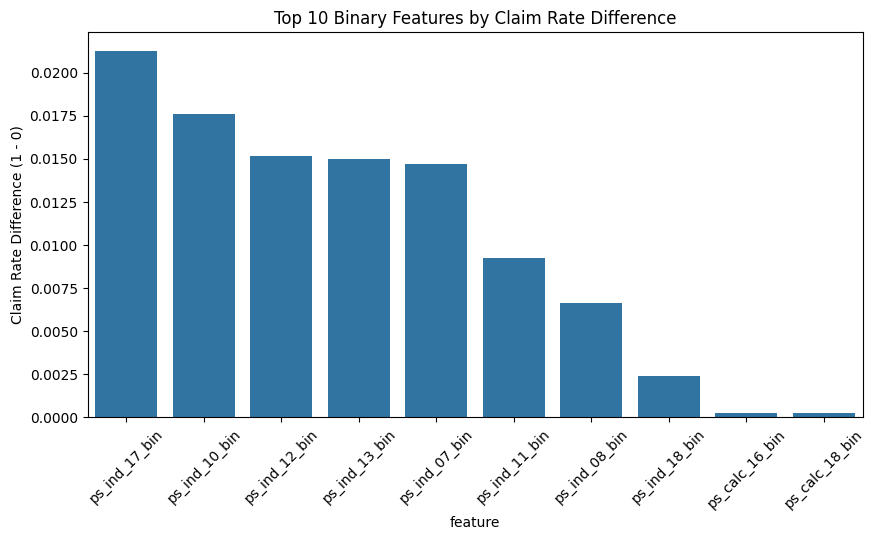

In [31]:
bin_corr = []

for c in bin_features:
    mean_0 = train.loc[train[c]==0, "target"].mean()
    mean_1 = train.loc[train[c]==1, "target"].mean()
    diff = mean_1 - mean_0
    bin_corr.append({"feature": c, "claim_rate_diff": diff})

bin_corr_df = pd.DataFrame(bin_corr).sort_values("claim_rate_diff", ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x="feature", y="claim_rate_diff", data=bin_corr_df.head(10))
plt.xticks(rotation=45)
plt.ylabel("Claim Rate Difference (1 - 0)")
plt.title("Top 10 Binary Features by Claim Rate Difference")
plt.show()


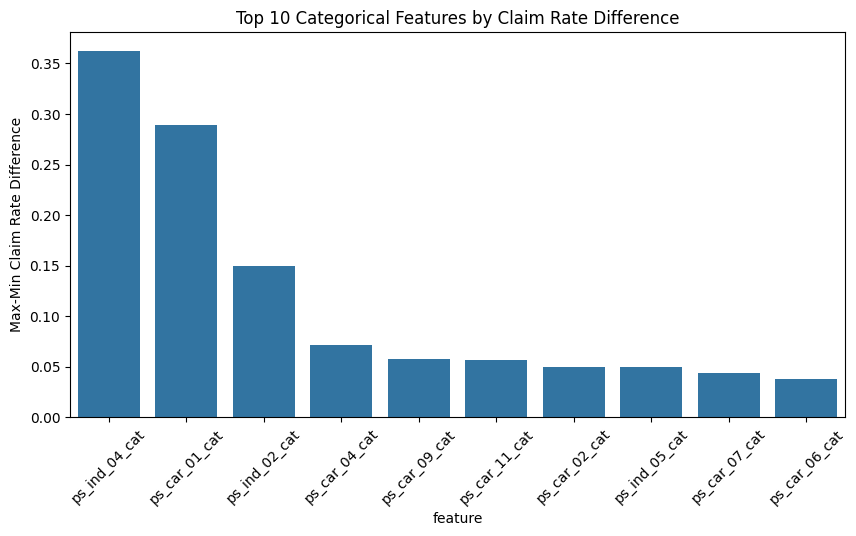

In [32]:
cat_corr = []

for c in cat_features:
    rates = train.groupby(c)["target"].mean()
    diff = rates.max() - rates.min()
    cat_corr.append({"feature": c, "claim_rate_diff": diff})

cat_corr_df = pd.DataFrame(cat_corr).sort_values("claim_rate_diff", ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x="feature", y="claim_rate_diff", data=cat_corr_df.head(10))
plt.xticks(rotation=45)
plt.ylabel("Max-Min Claim Rate Difference")
plt.title("Top 10 Categorical Features by Claim Rate Difference")
plt.show()
